## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_boston
var = load_boston()

In [4]:
print(var.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
df =pd.DataFrame(var.data,columns = var.feature_names)

In [12]:
df.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [15]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [16]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [18]:
df['MEDV']=var.target

In [19]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


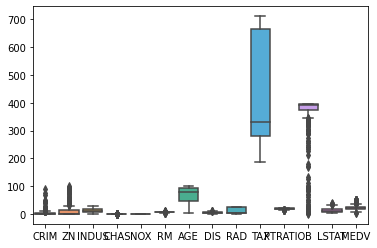

In [20]:
ax = sns.boxplot(data=df)

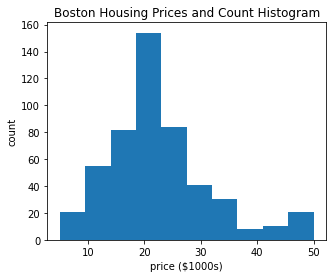

In [21]:
boston = load_boston()
plt.figure(figsize=(5, 4))
plt.hist(boston.target)
plt.title('Boston Housing Prices and Count Histogram')
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.show()

<AxesSubplot:>

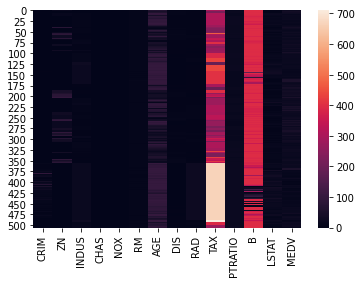

In [22]:
sns.heatmap(data=df)

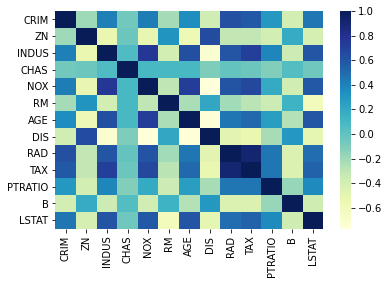

In [23]:
boston = load_boston()
boston_pd = pd.DataFrame(boston.data, columns = boston.feature_names)
correlation_matrix = boston_pd.corr().round(2)
sns.heatmap(correlation_matrix, cmap="YlGnBu")
plt.show()

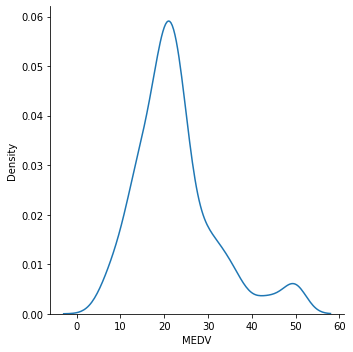

In [24]:
sns.displot(df,x= 'MEDV',kind='kde')

## Model Implementation

In [30]:
x1 = [['NOX','RM','DIS','PTRATIO','LSTAT' ]]
y1=[['MEDV']]

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,
                                               train_size=0.5,
                                               test_size=0.5,
                                              random_state=123)


ValueError: With n_samples=1, test_size=0.5 and train_size=0.5, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
train_size=0.5
test_size=0.5

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,train_size=0.5,test_size = 0.5,
                                                random_state=5)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

ValueError: With n_samples=1, test_size=0.5 and train_size=0.5, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [28]:
y_test

NameError: name 'y_test' is not defined

In [32]:
X=df.drop(['MEDV'],axis=1)
y = df['MEDV']

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4)

In [34]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
289,0.04297,52.5,5.32,0.0,0.405,6.565,22.9,7.3172,6.0,293.0,16.6,371.72,9.51
68,0.13554,12.5,6.07,0.0,0.409,5.594,36.8,6.4980,4.0,345.0,18.9,396.90,13.09
211,0.37578,0.0,10.59,1.0,0.489,5.404,88.6,3.6650,4.0,277.0,18.6,395.24,23.98
226,0.38214,0.0,6.20,0.0,0.504,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,6.28807,0.0,18.10,0.0,0.740,6.341,96.4,2.0720,24.0,666.0,20.2,318.01,17.79
364,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29
337,0.03041,0.0,5.19,0.0,0.515,5.895,59.6,5.6150,5.0,224.0,20.2,394.81,10.56
39,0.02763,75.0,2.95,0.0,0.428,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32


In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [37]:
lr.intercept_

36.35704137659466

In [38]:
y_pred = lr.predict(X_train)

In [39]:
y_pred

array([24.52247959, 15.19750953, 25.5772058 , 13.93939959, 39.46651291,
       17.45959949, 39.71029914, 16.51748069, 20.19733317, 40.7977555 ,
       33.57245034, 14.50420619, 11.44514488, 23.06563951, 24.39734404,
       25.01096096, 14.36116466, 28.28341539, 25.04931481, 22.42825155,
       21.81588517, 18.85208726, 13.3562124 , 13.65792701, 23.64766018,
       18.06876331, 16.12957228, 41.12414874, 19.43391814, 13.17980896,
       12.88401778, 24.48360463, 24.47855835, 22.1443201 , 23.67882714,
       16.25760322, 18.73996794,  6.65661308, 13.32321855, 15.97333187,
       18.13637439, 20.60454402, 30.72884443,  7.75848746, 13.9207036 ,
       -3.80684116, 30.22337446,  9.24045737, 11.75825936, 25.0286616 ,
       18.84078418, 11.88476435, 28.69569373, 23.23374551, 28.59506092,
       20.30414612, 20.27099511, 25.21759304, 29.00813278, 17.29931495,
       10.61483731, 28.61476335, 28.34559327, 30.02547802, 17.11529423,
       20.57024793, 18.28474144, 13.03972891, 23.08527124, 22.90

# Model Testing

In [41]:
from sklearn import metrics

In [42]:
y_pred = lr.predict(X_train)

In [43]:
y_pred

array([24.52247959, 15.19750953, 25.5772058 , 13.93939959, 39.46651291,
       17.45959949, 39.71029914, 16.51748069, 20.19733317, 40.7977555 ,
       33.57245034, 14.50420619, 11.44514488, 23.06563951, 24.39734404,
       25.01096096, 14.36116466, 28.28341539, 25.04931481, 22.42825155,
       21.81588517, 18.85208726, 13.3562124 , 13.65792701, 23.64766018,
       18.06876331, 16.12957228, 41.12414874, 19.43391814, 13.17980896,
       12.88401778, 24.48360463, 24.47855835, 22.1443201 , 23.67882714,
       16.25760322, 18.73996794,  6.65661308, 13.32321855, 15.97333187,
       18.13637439, 20.60454402, 30.72884443,  7.75848746, 13.9207036 ,
       -3.80684116, 30.22337446,  9.24045737, 11.75825936, 25.0286616 ,
       18.84078418, 11.88476435, 28.69569373, 23.23374551, 28.59506092,
       20.30414612, 20.27099511, 25.21759304, 29.00813278, 17.29931495,
       10.61483731, 28.61476335, 28.34559327, 30.02547802, 17.11529423,
       20.57024793, 18.28474144, 13.03972891, 23.08527124, 22.90

In [44]:
metrics.r2_score(y_train,y_pred)

0.7465991966746854

In [45]:
metrics.mean_absolute_error(y_train,y_pred)

3.08986109497113

In [47]:
metrics.mean_squared_error(y_train,y_pred)

19.07368870346903

In [49]:
np.sqrt(metrics.mean_squared_error(y_train,y_pred))

4.367343437774162

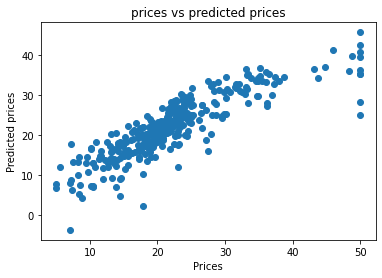

In [51]:
#vsualizing the diff btween actual prices and predicted
plt.scatter(y_train,y_pred)
plt.xlabel('Prices')
plt.ylabel("Predicted prices")
plt.title('prices vs predicted prices')
plt.show()

C:\Users\ppyad\.conda\envs\Houseprice\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


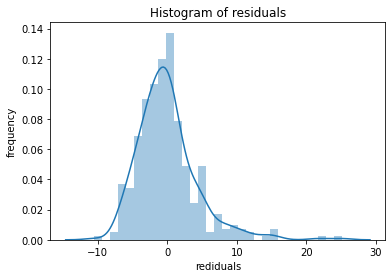

In [52]:
sns.distplot(y_train-y_pred)
plt.title("Histogram of residuals")
plt.xlabel("rediduals")
plt.ylabel("frequency")
plt.show()

In [53]:
y_test_pred = lr.predict(X_test)

In [55]:
acc_linearreg= metrics.r2_score(y_test,y_test_pred)
acc_linearreg

0.7121818377409181

In [56]:
print("MAE:",metrics.mean_absolute_error(y_test,y_test_pred))
print("MSE:",metrics.mean_squared_error(y_test,y_test_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

MAE: 3.859005592370746
MSE: 30.053993307124284
RMSE: 5.482152251362988


In [57]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

#
rf_reg = RandomForestRegressor()

rf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [58]:
y_pred = rf_reg.predict(X_train)